Project 1:Simple Data Analytics - Sales Data Analysis

Description: Analyzing a small dataset (e.g., sales data of a retail store). Focus on basic descriptive statistics and creating
visualizations like bar charts and pie charts.

In [11]:
import pandas as pd
# Load the CSV file to inspect its structure and contents
file_path_csv = r"C:\Users\HP\Desktop\INTERNSHIP\Product Sales Data.csv"
sales_data = pd.read_csv(file_path_csv)

# Display the first few rows of the dataset to understand its structure
sales_data.head()


,Month,Cream,Detergent,Moisturizer,Sanitizer,Shampoo,Soap,Total Units,Total Profit
0,Jan,5100,9600,1525,1550,1200,2510,21485,211500
1,Feb,5000,6500,1225,1250,2100,2640,18715,183800
2,Mar,4450,9950,1365,1390,3550,2150,22855,225200
3,Apr,5770,9270,1155,1180,1870,3410,22655,223200
4,May,4460,8160,1765,1790,1560,3610,21345,210100


In [13]:
# Descriptive statistics for the dataset
# Total and average units sold for each product
product_totals = sales_data.iloc[:, 1:7].sum()  # Summing columns related to product sales
product_averages = sales_data.iloc[:, 1:7].mean()  # Average units sold per product

# Total and average profit
total_profit = sales_data["Total Profit"].sum()
average_profit = sales_data["Total Profit"].mean()

# Best-selling product based on total units sold
best_selling_product = product_totals.idxmax()
best_selling_units = product_totals.max()

# Prepare results
product_totals, product_averages, total_profit, average_profit, best_selling_product, best_selling_units


(Cream           68710
 Detergent      118810
 Moisturizer     18815
 Sanitizer       19115
 Shampoo         25410
 Soap            34600
 dtype: int64,
 Cream          5725.833333
 Detergent      9900.833333
 Moisturizer    1567.916667
 Sanitizer      1592.916667
 Shampoo        2117.500000
 Soap           2883.333333
 dtype: float64,
 3129300,
 260775.0,
 'Detergent',
 118810)

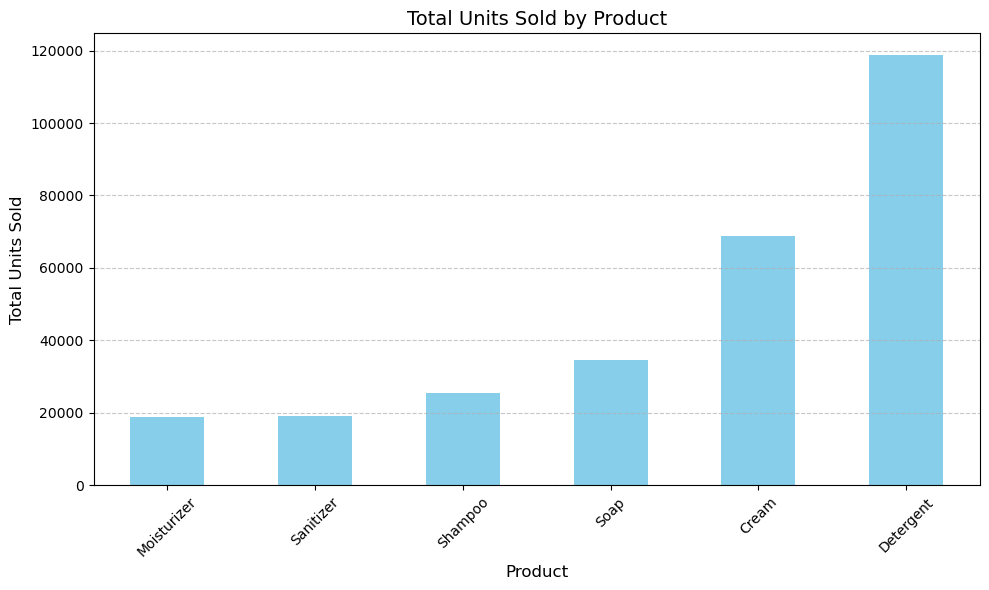

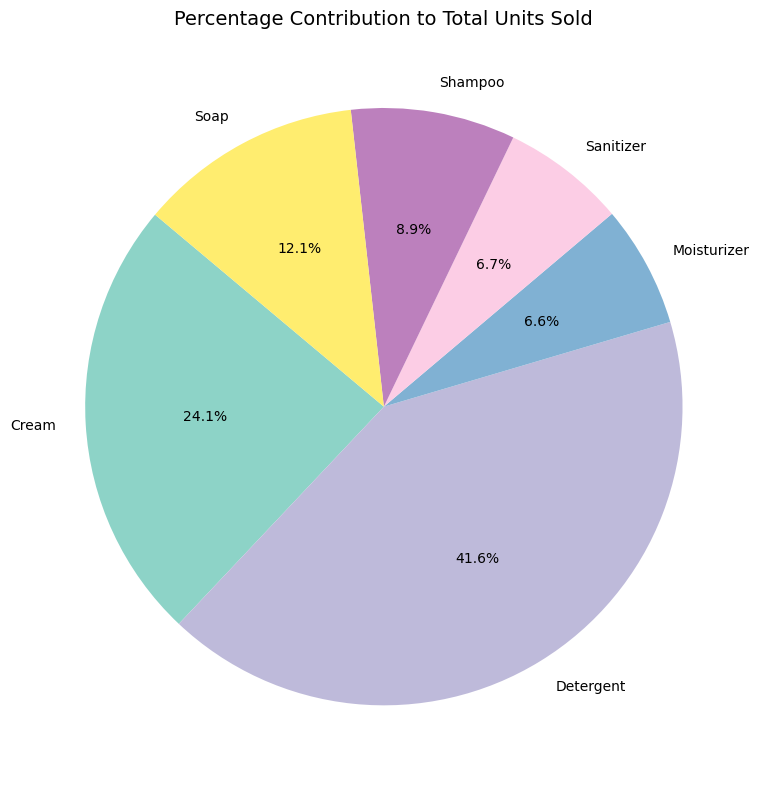

In [15]:
import matplotlib.pyplot as plt

# Bar Chart: Units sold for each product
plt.figure(figsize=(10, 6))
product_totals.sort_values().plot(kind='bar', color='skyblue')
plt.title('Total Units Sold by Product', fontsize=14)
plt.ylabel('Total Units Sold', fontsize=12)
plt.xlabel('Product', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Pie Chart: Contribution of each product to total units sold
plt.figure(figsize=(8, 8))
product_totals.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.title('Percentage Contribution to Total Units Sold', fontsize=14)
plt.ylabel('')  # Remove y-axis label for better visualization
plt.tight_layout()
plt.show()


Project 2: Linear Regression on Simple Dataset

Description: Building a linear regression model using a simple dataset (e.g., predicting sales based on advertising spend).

In [17]:
# Import necessary libraries for linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Use the uploaded dataset for regression analysis
# Selecting Total Units Sold (as predictor) and Total Profit (as target)
X = sales_data[['Total Units']]  # Predictor variable
y = sales_data['Total Profit']  # Target variable

# Split the dataset into training and testing sets (80%-20% split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Results
model.coef_, model.intercept_, mse, r2


(array([11.27298338]),
 -10683.466001968976,
 2880616891.687731,
 0.6021915285372657)